# Grouping 

In [19]:
%run "./workflow.ipynb"

No meaningful growth found for this group: A11
No meaningful growth found for this group: A2
No meaningful growth found for this group: B11
No meaningful growth found for this group: B2
No meaningful growth found for this group: B4
No meaningful growth found for this group: B9
No meaningful growth found for this group: C11
No meaningful growth found for this group: C2
No meaningful growth found for this group: D11
No meaningful growth found for this group: D2


Grouping By Biological Replicate. You can manually change the things to group by, qualities you want to retain. 

In [20]:
group =["bio rep"]
by_bio_rep = (with_mu.groupby(group+["time_hours"], as_index=False)
    .agg(
        strain =("strain", "first"),
        od_mean=("od", "mean"),
        od_std=("od_smooth", "std"),
        mu_mean=("mu", "mean"),
        mu_std=("mu", "std"),
        n=("od_smooth", "size"),
    )
)
by_bio_rep.head()

,bio rep,time_hours,strain,od_mean,od_std,mu_mean,mu_std,n
0,88,0.234444,WT,0.087250,0.000077,3.409632,0.623988,8
1,88,0.484444,WT,0.087375,0.000103,3.111199,0.427546,8
2,88,0.734444,WT,0.087500,0.000119,2.934066,0.315322,8
3,88,0.984444,WT,0.087500,0.000156,2.791380,0.232578,8
4,88,1.234444,WT,0.088500,0.000197,2.682710,0.176026,8


If you want to further group by condition, you can, but it's important to first group by bio rep and only then by condition -- to give each bio rep an equal weight even if the number of wells is not equal (let's say you removed some)

In [21]:
group2 =["strain"]
by_strain = (with_mu.groupby(group2+["time_hours"], as_index=False)
    .agg(
        od_mean=("od", "mean"),
        od_std=("od_smooth", "std"),
        mu_mean=("mu", "mean"),
        mu_std=("mu", "std"),
        n=("od_smooth", "size"),
    )
)

# Plotting Helpers

In [22]:
from plot_helpers import *

`plot_grouped`

plots by group on the same axes 

`df`: The data frame you want to draw from. If you want only particular wells/timepoints/conditions, you need to create a mask first (shown). 

`group_by`: colors by 

`plot_by`: If provided, it gives unique line to each (lower level of orginization like "well" or "bio rep" if grouped by bio rep already). if not provided it creates a mean with standard deviation shadows. 

`ylim`, `xlim`: Optional. lower and upper bounds for axis in case you want to change it manually.

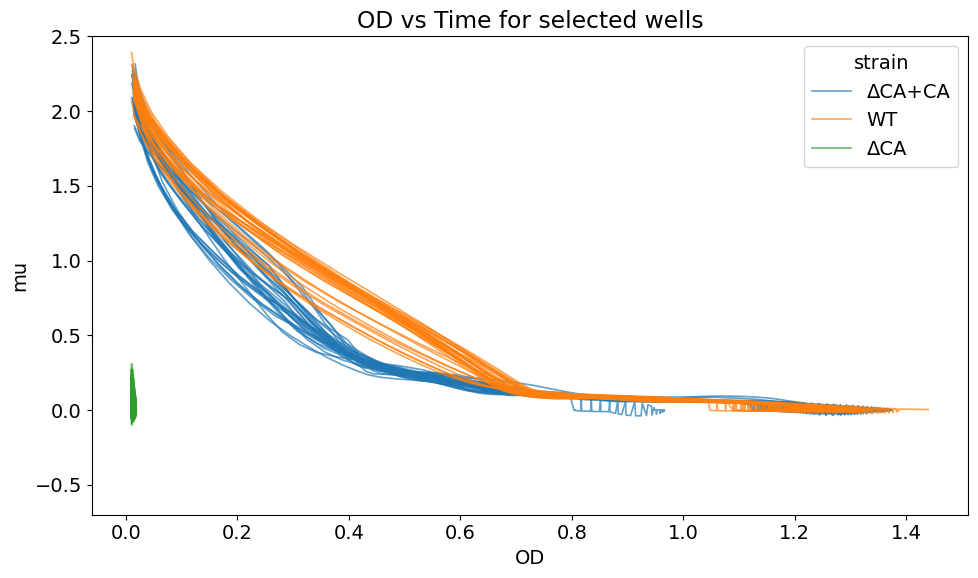

In [23]:
threshold_od = 0.01 # Set your OD threshold if you want one
mask = with_mu["od_smooth"] > threshold_od

plot_grouped(df=with_mu[mask],
             group_by="strain",
             x_col="od_smooth",
             y_col="mu",
             x_label="OD",
             y_label="mu",
             title="OD vs Time for selected wells",
             plot_by= "well",
             marker=None,
             log=False,
             font_size=14,
             ylim=(-0.7,2.5)
             )

`plot_seperate_by_group`

If you want to plot different conditions in the same plot but seperately:

`group_by` : each group gets its own subplot

`df`: your FataFrame

`title`: one title for evreyone

`plot_by`: draw individual lines per plot_by within each group_by. for example, within each strain, draw individual lines per well. if remains empty, a single mean line is created with the standard deviation shadowed. Notice you can only go 'time' level of aggregation (to plot by bio rep in each strain, you'd have to first aggregate df by bio rep)

`log`: if True, plots in log scale 

`col_wrap` : number of columns inthe subplot grid

`sharey` : share the y axis across panels (uniform scale)


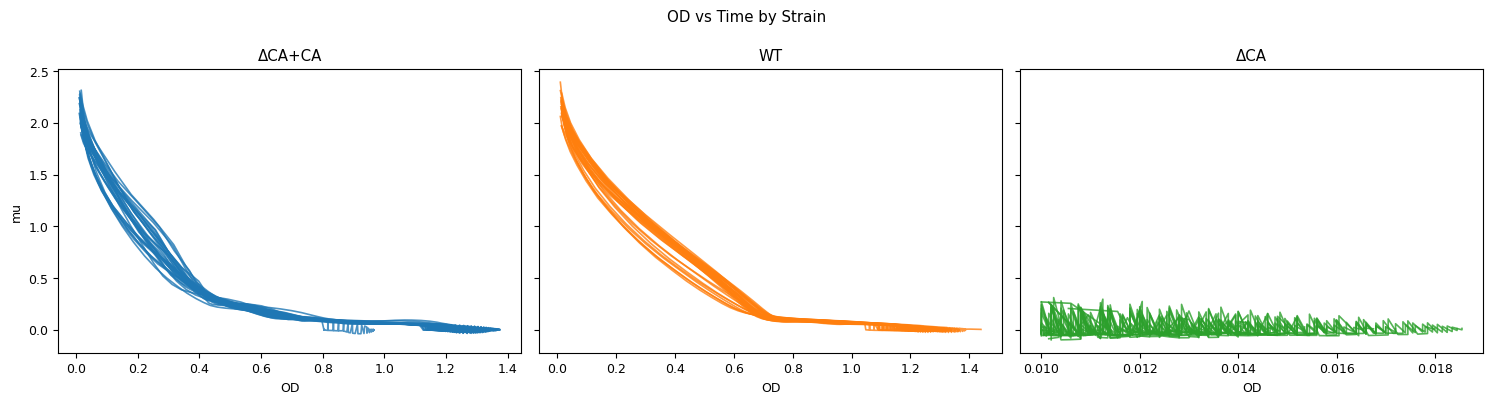

In [24]:

plot_separate_by_group(
    group_by="strain",
    df=with_mu[mask],
    x_col="od_smooth",
    y_col="mu",     
    x_label="OD",
    y_label="mu",
    title="OD vs Time by Strain",
    plot_by="well",     
    marker=None,
    log=False,
    font_size=9,
    col_wrap=3, 
    sharey=True 
)